In [63]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
df=pd.read_stata("automobile_dataset.dta")

In [64]:
df.head(5)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


### Exercise 1: regress price of guzzler.

In [66]:
df['guzzler']=(df.mpg<18).astype('int')
smf.ols('price~guzzler', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     43.90
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           5.38e-09
Time:                        13:26:44   Log-Likelihood:                -678.10
No. Observations:                  74   AIC:                             1360.
Df Residuals:                      72   BIC:                             1365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5143.0893    312.807     16.442      0.000    4519.521    5766.658
guzzler     4202.2440    634.243      6.626      0.000    2937.904    5466.584
==============================================================================
Omnibus:                       37.244   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.225
Skew:                           1.565   Prob(JB):                     7.04e-25
Kurtosis:                       8.126   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the regression coefficients, we observe that guzzlers are about 4200 dollars more expensive than non-guzzlers.

### Exercise 2

([], <a list of 0 Text xticklabel objects>)

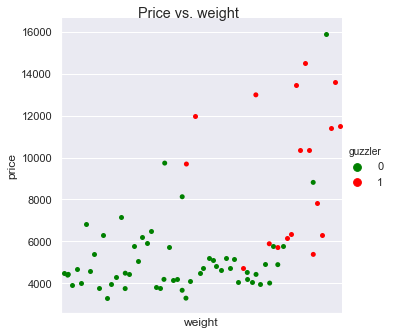

In [126]:
import seaborn as sns
g = sns.catplot(x="weight", y="price", data=df, hue='guzzler',palette=sns.color_palette(['green', 'red']))
g.fig.suptitle("Price vs. weight")
plt.xticks([])

The graph suggests that the heavier cars tend to be higher in price. Therefore, we have to control for this bias when regress price on guzzler.

### Exercise 3: regress price on guzzler controlling for weight.

In [67]:
smf.ols('price ~ guzzler+weight+foreign+headroom+displacement', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     20.04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           3.14e-12
Time:                        13:29:35   Log-Likelihood:                -662.20
No. Observations:                  74   AIC:                             1336.
Df Residuals:                      68   BIC:                             1350.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -782.5353   1612.628     -0.485      0.629   -4000.484    2435.414
foreign[T.Foreign]  3278.9827    671.826      4.881      0.000    1938.375    4619.591
guzzler             1977.1796    711.055      2.781      0.007     558.291    3396.068
weight                 1.9634      0.702      2.797      0.007       0.563       3.364
headroom            -736.7997    309.009     -2.384      0.020   -1353.418    -120.182
displacement           8.9667      5.819      1.541      0.128      -2.646      20.579
==============================================================================
Omnibus:                       22.179   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.284
Skew:                           1.118   Prob(JB):                     8.01e-09
Kurtosis:                       5.663   Cond. No.                     2.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When controlling for weight, the increase in price for guzzlers is significantly lower: they tend to be only 1977 dollars more expensive than non-guzzlers. It, however, confirms our initial guess that guzzlers are indeed more expensive.

### Exercise 4: add car’s repair records as dummies.

In [79]:
#Creating 5 dummy variables for the car’s repair record.
df['very_poor'] = (df.rep78 == 1).astype('int')
df['poor'] = (df.rep78 == 2).astype('int')
df['acceptable'] = (df.rep78 == 3).astype('int')
df['good'] = (df.rep78 == 4).astype('int')
df['very_good'] = (df.rep78 == 5).astype('int')

In [80]:
smf.ols('price ~ guzzler+weight+foreign+headroom+displacement+very_poor+poor+good+very_good', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     11.03
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           3.68e-10
Time:                        13:36:31   Log-Likelihood:                -661.07
No. Observations:                  74   AIC:                             1342.
Df Residuals:                      64   BIC:                             1365.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -351.4778   1692.042     -0.208      0.836   -3731.720    3028.765
foreign[T.Foreign]  3407.2295    755.330      4.511      0.000    1898.285    4916.174
guzzler             1993.6082    735.631      2.710      0.009     524.016    3463.200
weight                 2.0029      0.719      2.784      0.007       0.566       3.440
headroom            -804.9891    328.841     -2.448      0.017   -1461.925    -148.053
displacement           8.5699      5.940      1.443      0.154      -3.298      20.437
very_poor          -1521.0747   1508.528     -1.008      0.317   -4534.706    1492.557
poor                -504.8845    781.391     -0.646      0.521   -2065.892    1056.123
good                -611.9081    623.087     -0.982      0.330   -1856.667     632.851
very_good           -440.8515    834.723     -0.528      0.599   -2108.402    1226.699
==============================================================================
Omnibus:                       21.857   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.025
Skew:                           1.132   Prob(JB):                     2.48e-08
Kurtosis:                       5.497   Cond. No.                     2.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Non-guzzler cars of "very poor" quality are about 1521 dollars cheaper than non-guzzlers of "acceptable" quality. For example, we may predict that a foreign guzzler of a very good quality would cost -351+3407+1993-440 = 4609 dollars, whereas foreign non-guzzler of a very poor quality is only -351+3407-1521 = 1535 dollars.

### Exercise 5: add an interaction effect between guzzler and foreign.

In [82]:
smf.ols('price ~ guzzler+foreign+guzzler*foreign+headroom+weight+displacement', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     18.15
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           2.21e-12
Time:                        13:48:25   Log-Likelihood:                -660.00
No. Observations:                  74   AIC:                             1334.
Df Residuals:                      67   BIC:                             1350.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -391.7038   1588.834     -0.247      0.806   -3563.030    2779.622
foreign[T.Foreign]          2929.3402    679.319      4.312      0.000    1573.413    4285.267
guzzler                     1354.9011    760.244      1.782      0.079    -162.552    2872.354
guzzler:foreign[T.Foreign]  2797.6787   1381.501      2.025      0.047      40.190    5555.167
headroom                    -736.8717    302.195     -2.438      0.017   -1340.056    -133.688
weight                         1.6417      0.705      2.330      0.023       0.235       3.048
displacement                  12.6296      5.972      2.115      0.038       0.710      24.549
==============================================================================
Omnibus:                       26.353   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.874
Skew:                           1.311   Prob(JB):                     6.63e-11
Kurtosis:                       5.885   Cond. No.                     2.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

An interaction means that a foreign guzzler is even more expensive (by about 2700 dollars!) than if it were just a guzzler or just a foreign car. Because of this combined effect, we predict that the foreign guzzler costs about -391+2929+1354+2797 = 6689 dollars.

### Exercise 6: What is the price difference between a foreign guzzler and a foreign non-guzzler?

The price of a foreign guzzler is calculated as follows: intercept + price(foreign)+price(guzzler)+price(foreign guzzler). Price of a foreign non-guzzler is just an intercept + price(foreign). Therefore, the difference in price is price(guzzler)+price(foreign guzzler) = 1354.9011 + 2797.6787 = 4152.5798 dollars. 

### Exercise 7: What is the price difference between a domestic non-guzzler and a foreign non-guzzler?

The price for a domestic non-guzzler is just an intercept whereas the price for a foreign non-guzzler is an intercept+price(foreign). Therefore, the difference is just 2929 dollars.

### Exercise 8: regress price on foreign, mpg and their interaction, controlling for headroom, weight and displacement.

In [85]:
smf.ols('price ~ mpg+foreign*mpg+headroom+weight+displacement', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     16.71
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           1.12e-11
Time:                        14:06:55   Log-Likelihood:                -661.86
No. Observations:                  74   AIC:                             1338.
Df Residuals:                      67   BIC:                             1354.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.232e+04   4465.992     -2.758      0.007   -2.12e+04   -3404.206
foreign[T.Foreign]      1.176e+04   2796.011      4.208      0.000    6184.000    1.73e+04
mpg                      259.8139    109.998      2.362      0.021      40.257     479.371
foreign[T.Foreign]:mpg  -314.4806    109.360     -2.876      0.005    -532.764     -96.197
headroom                -484.5821    319.958     -1.515      0.135   -1123.222     154.058
weight                     3.4327      0.856      4.008      0.000       1.723       5.142
displacement              14.4670      5.839      2.478      0.016       2.813      26.121
==============================================================================
Omnibus:                       22.563   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.595
Skew:                           1.228   Prob(JB):                     5.07e-08
Kurtosis:                       5.204   Cond. No.                     6.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. Foreign cars, on average, are about 11760 dollars more expensive than domestic cars. 
2. With each unit increase in mpg, the price of a car increases by 259 dollars.
3. Interaction term: less consuming international cars are cheaper than less consuming domestic cars. The difference in price between domestic and international cars will be about 315 dollars with a unit increase in mpg.